### Deep Learning Decision Boundary (make_circles + MLP)

###  Goal
We have a set of data points **(X, y)** where:
- **X** = coordinates of points on a 2D plane (Feature 1, Feature 2)  
- **y** = label showing which group (or color) the point belongs to —  
  🟢 **green** (inner circle → class 1) or 🔴 **red** (outer circle → class 0).

Our goal is to **train models that can automatically classify** a new point as belonging to the green inner circle or the red outer circle — **just based on its (x, y) position**.

We will:
1. Generate a **synthetic dataset** of two concentric circles.  
2. Train a **Logistic Regression** model (linear baseline).  
3. Train a **Neural Network (MLPClassifier)**.  
4. Compare both models and **visualize their decision boundaries** to see how the neural network can learn curved patterns that the linear model cannot.

In [2]:
# Import required libraries for data, models, and plots
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import sklearn modules for dataset, model building, scaling, and evaluation
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Fix random seed for consistent results
np.random.seed(42)

Matplotlib is building the font cache; this may take a moment.


#### Step 1: Generate a Non-Linear Dataset

We will use `make_circles()` to create 300 data points forming two circles:
- X → coordinates of each point (x, y)
- y → label (0 = outer circle, 1 = inner circle)


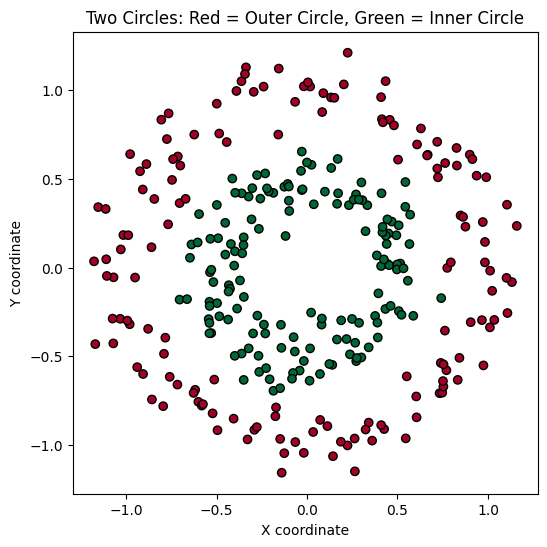

In [5]:
# Create data: two circular groups of points
X, y = make_circles(n_samples=300, factor=0.5, noise=0.1, random_state=0)

# Plot the generated data
plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlGn, edgecolors='k')
plt.xlabel("X coordinate")
plt.ylabel("Y coordinate")
plt.title("Two Circles: Red = Outer Circle, Green = Inner Circle")
plt.show()

#### Step 2: Split and Scale the Data

We split the data into:
- **Training data (75%)** → to train the models
- **Testing data (25%)** → to evaluate performance

We also use `StandardScaler()` to normalize features,  
so both Logistic Regression and Neural Network work efficiently.


In [6]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# Standardize features (mean=0, std=1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#### Step 3: Train Logistic Regression (Linear Model)

Logistic Regression can only draw **a straight line** to separate classes.  
It usually performs poorly on circular, non-linear data like ours.


In [7]:
# Train logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_lr = logreg.predict(X_test_scaled)
acc_lr = accuracy_score(y_test, y_pred_lr)
print(f"🔹 Logistic Regression Accuracy: {acc_lr:.3f}")


🔹 Logistic Regression Accuracy: 0.440


#### Step 4: Train a Neural Network (MLPClassifier)

We’ll train a simple neural network:
- One hidden layer with 8 neurons
- Activation function: ReLU
- Max iterations: 3000

Unlike Logistic Regression, this model can learn **curved** boundaries.


In [8]:
# Train Multi-Layer Perceptron (Neural Network)
mlp = MLPClassifier(hidden_layer_sizes=(8,), activation='relu', max_iter=3000, random_state=42)
mlp.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_mlp = mlp.predict(X_test_scaled)
acc_mlp = accuracy_score(y_test, y_pred_mlp)
print(f"🔹 Neural Network (MLP) Accuracy: {acc_mlp:.3f}")


🔹 Neural Network (MLP) Accuracy: 0.987


#### Step 5: Visualize Decision Boundaries

We’ll plot how each model divides the 2D space.
This helps us **see the difference** between a straight-line (linear) boundary and a curved (non-linear) one.


In [9]:
def plot_decision_boundary(model, scaler, X, y, title):
    # Create a grid of (x, y) points to cover the data area
    x_min, x_max = X[:,0].min() - 0.3, X[:,0].max() + 0.3
    y_min, y_max = X[:,1].min() - 0.3, X[:,1].max() + 0.3
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))

    # Scale the grid using the same scaler
    grid = np.c_[xx.ravel(), yy.ravel()]
    grid_scaled = scaler.transform(grid)

    # Predict each grid point and reshape for contour plot
    zz = model.predict(grid_scaled).reshape(xx.shape)

    # Draw decision regions
    plt.figure(figsize=(6,6))
    plt.contourf(xx, yy, zz, cmap=plt.cm.RdYlGn, alpha=0.4)
    plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlGn, edgecolors='k')
    plt.xlabel("X coordinate")
    plt.ylabel("Y coordinate")
    plt.title(title)
    plt.show()


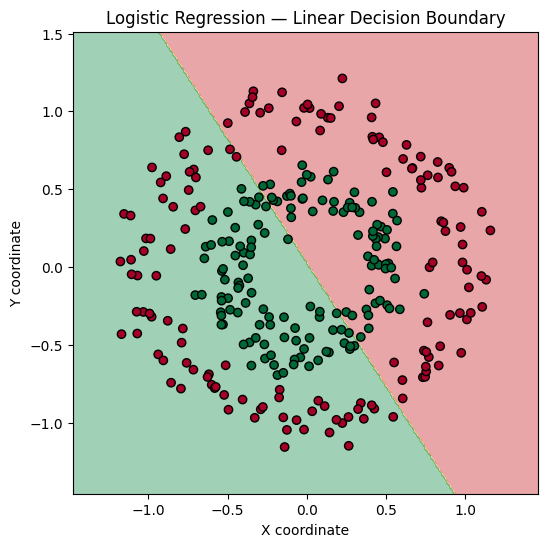

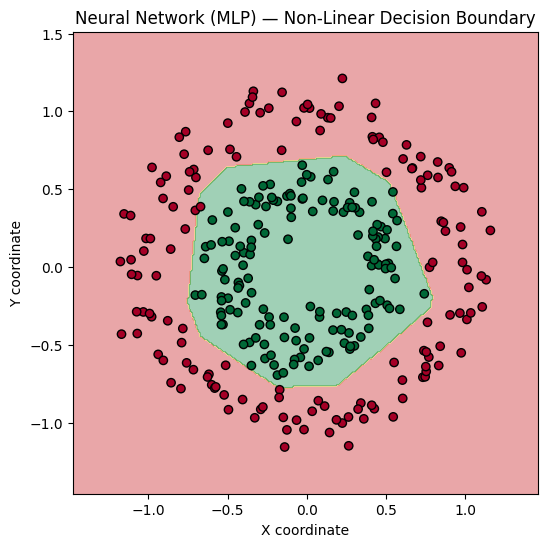

In [10]:
plot_decision_boundary(logreg, scaler, X, y, "Logistic Regression — Linear Decision Boundary")
plot_decision_boundary(mlp, scaler, X, y, "Neural Network (MLP) — Non-Linear Decision Boundary")


#### Step 6: Evaluate Model Performance

Now we’ll compare both models using accuracy, classification report, and confusion matrix.


In [11]:
print("Classification Report — Neural Network (MLP):\n")
print(classification_report(y_test, y_pred_mlp))

print("Confusion Matrix — Neural Network (MLP):\n")
print(confusion_matrix(y_test, y_pred_mlp))


Classification Report — Neural Network (MLP):

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       0.97      1.00      0.99        37

    accuracy                           0.99        75
   macro avg       0.99      0.99      0.99        75
weighted avg       0.99      0.99      0.99        75

Confusion Matrix — Neural Network (MLP):

[[37  1]
 [ 0 37]]


#### Step 7: Predict on New Points

Let’s try predicting the class for a few new coordinates  
and see if they belong to the inner (green) or outer (red) circle.


🟢 Predicted Classes for New Points: [1 0 1]


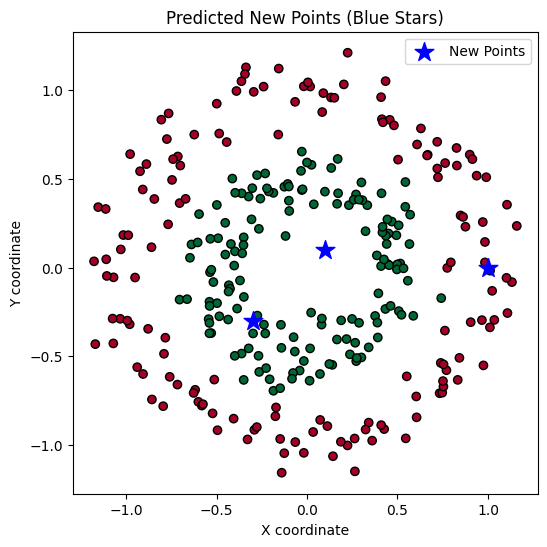

In [12]:
# Define a few new test points
new_points = np.array([
    [0.1, 0.1],   # expected inner circle
    [1.0, 0.0],   # expected outer circle
    [-0.3, -0.3]  # expected inner circle
])

# Scale and predict
new_points_scaled = scaler.transform(new_points)
preds = mlp.predict(new_points_scaled)
print("🟢 Predicted Classes for New Points:", preds)

# Visualize on the plot
plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlGn, edgecolors='k')
plt.scatter(new_points[:,0], new_points[:,1], color='blue', marker='*', s=200, label='New Points')
plt.xlabel("X coordinate")
plt.ylabel("Y coordinate")
plt.title("Predicted New Points (Blue Stars)")
plt.legend()
plt.show()


# ✅ Summary — Key Learnings

- **X** represents 2D coordinates (x, y) of each point.  
- **y** represents which circle (color/group) each point belongs to.  
- Logistic Regression draws a **straight line**, so it fails on curved data.  
- Neural Network (MLP) learns **non-linear decision boundaries**, successfully separating circles.  
- This simple example shows **why deep learning is powerful** for complex real-world data —  
  like images, speech, and natural language.